## Домашнее задание №1.2. DimensionalityReduction

### Алгоритмы уменьшения размерности 

#### Повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf). Необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [17]:
!pip install dataget

  Using cached dataget-0.4.15-py3-none-any.whl (16 kB)


In [20]:
!pip install gensim

  Using cached gensim-4.1.2-cp39-cp39-win_amd64.whl (24.0 MB)


In [16]:
import pandas as pd
from sklearn.datasets import load_digit
import warnings
warnings.filterwarnings('ignore')
import dataget

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.downloader import load

import matplotlib.pyplot as plt
import time

In [13]:
!wget https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true

--2021-11-24 22:23:13--  https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
Resolving jundongl.github.io (jundongl.github.io)... 185.199.110.153, 185.199.111.153, 185.199.109.153, ...
Connecting to jundongl.github.io (jundongl.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3024549 (2,9M) [application/octet-stream]
Saving to: 'COIL20.mat@raw=true.3'

     0K .......... .......... .......... .......... ..........  1% 1,02M 3s
    50K .......... .......... .......... .......... ..........  3% 1,68M 2s
   100K .......... .......... .......... .......... ..........  5% 1,01M 2s
   150K .......... .......... .......... .......... ..........  6% 4,47M 2s
   200K .......... .......... .......... .......... ..........  8% 3,01M 2s
   250K .......... .......... .......... .......... .......... 10% 1,13M 2s
   300K .......... .......... .......... .......... .......... 11% 4,00M 2s
   350K .......... .......... ......

## Загрузка datasets

In [17]:
word2vec = load('word2vec-google-news-300').vectors
word2vec = word2vec[:30000]

In [ ]:
mnist_dataset = load_digits()
mnist = pd.DataFrame(mnist_dataset.data)

In [ ]:
__, __, fashionmnist_x, fashionmnist_y = dataget.image.fashion_mnist().get()
fashionmnist = fashionmnist_x.reshape(-1, 28*28)

In [ ]:
coil20 = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/coil20.csv')

In [ ]:
datasets = [
    ("COIL20", coil20.drop('1025', axis=1), coil20['1025']), 
    ("MNIST",  mnist, mnist_dataset.target), 
    ("Fashion MNIST", fashionmnist, fashionmnist_y),
    ('Word2Vec', word2vec, None)
]

## Алгоритмы

In [53]:
pca = PCA(n_components=2)
tsne = TSNE(n_jobs=-1, random_state=2)
umap = UMAP(random_state = 2)
algorithms = [
  ("UMAP", umap),
  ("TSNE", tsne),
  ("PCA", pca)
]

## Готовые изображения

Dataset: COIL20 ((1440, 1024))
Algorithm: UMAP
Time: 4 seconds
_________________________________________
Dataset: MNIST ((1797, 64))
Algorithm: UMAP
Time: 6 seconds
_________________________________________
Dataset: Fashion MNIST ((10000, 784))
Algorithm: UMAP
Time: 18 seconds
_________________________________________
Dataset: Word2Vec ((30000, 300))
Algorithm: UMAP
Time: 28 seconds
_________________________________________
Dataset: COIL20 ((1440, 1024))
Algorithm: TSNE
Time: 8 seconds
_________________________________________
Dataset: MNIST ((1797, 64))
Algorithm: TSNE
Time: 11 seconds
_________________________________________
Dataset: Fashion MNIST ((10000, 784))
Algorithm: TSNE
Time: 77 seconds
_________________________________________
Dataset: Word2Vec ((30000, 300))
Algorithm: TSNE
Time: 313 seconds
_________________________________________
Dataset: COIL20 ((1440, 1024))
Algorithm: PCA
Time: 0 seconds
_________________________________________
Dataset: MNIST ((1797, 64))
Algorithm:

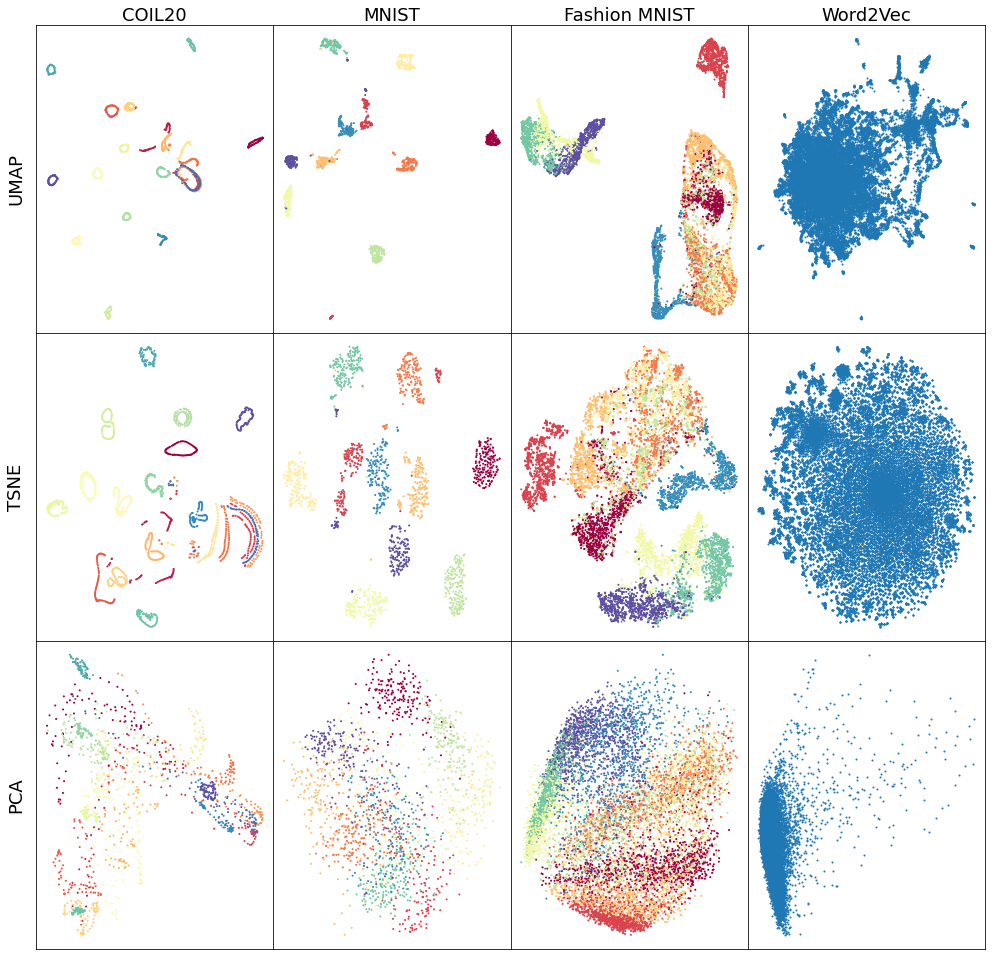

In [54]:
fig, ax = plt.subplots(len(algorithms), len(datasets), figsize=(17,17))
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(len(algorithms)):
    ax[i,0].set_ylabel(algorithms[i][0], fontsize=18)
    for j in range(len(datasets)):
        ax[0,j].set_xlabel(datasets[j][0], fontsize=18)
        ax[0,j].xaxis.set_label_position('top')
        print(f"Dataset: {datasets[j][0]} ({datasets[j][1].shape})")
        print(f"Algorithm: {algorithms[i][0]}")
        start = time.time()
        embedding = algorithms[i][1].fit_transform(datasets[j][1])
        ax[i, j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
        ax[i, j].set_yticklabels([])
        ax[i, j].set_xticklabels([])
        ax[i, j].tick_params(left = False, bottom=False)
        print(f"Time: {int(time.time() - start)} seconds")
        print("_________________________________________")
        

## Выводы

### Графики получились очень похожими на те, что представлены в статье.

## UMAP
- Сохраняет локальную структуру 
- Успешно отражает большую часть крупномасштабной глобальной структуры
- Захватил больше глобальной и топологической структуры наборов данных, чем t-SNE
- В два раза быстрее t-SNE

## T-SNE
- Очень хорошо сохраняет локальную структуру
- Самый медленный (худшее время на данных Word2Vec)

## PCA
-  Хорошо представлена большая часть крупномасштабной глобальной структуры (особенно для MNIST и Fashion-MNIST)
- Самый быстрый (на всех наборах данных)